# **Análisis de datos y perspectivas estadísticas con el conjunto de datos del Titanic**

##### *Emilio Zdenko Abarca Cruz*

## 1. Importación de datos

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
#%matplotlib qt

In [170]:
df = sns.load_dataset('titanic')
df.to_csv('titanic.csv', index=False)
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## 2. Limpieza de datos

Identificando valores nulos o inconsistencias (outlayers)

In [171]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**¿Qué valores nulos encontraron y por qué decidieron imputarlos, eliminarlos o manejarlos de otra manera?**

Se aprecia que la característica *Deck* es la que presenta mayor número de valores nulos, debido a su gran cantidad de valores nulos, se eliminará del listado; por otro lado, *Age*, *Embarked* y *Embarked Town* muestran menores valores nulos, con *Age* se calculará su media para rellenar dichos valores, y con los *Embarked* se rellenará con los valores más repetidos. 

In [172]:
df.drop('deck', axis=1, inplace=True) # Eliminar la columna 'deck'

df['age'] = df['age'].fillna(df['age'].mean()) # Rellenar los valores faltantes en 'age' con la media

df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0]) # Rellenar los valores faltantes en 'embark_town' con la moda
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0]) # Rellenar los valores faltantes en 'embarked' con la moda

**¿Qué cambios realizaron en los datos y cómo afectará esto su análisis posterior?**

Los cambios realizados consistieron en eliminar valores nulos presentes en los datos para que estos no lleguen a interferir de manera negativa en los próximos procedimientos del proyecto, ya que si no los eliminamos, los resultados obtenidos tendrán nula calidad y consistencia. 

In [173]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## 3. Transformación de datos

*Normalización*. Escalar las variables numéricas (como tarifa y edad) usando métodos de normalización o estandarización.

In [174]:
def z_score(df):
    df_numeric = df.select_dtypes(include=['float64', 'int64']).copy()
    for col in df_numeric.columns:
        df[f'{col}_zscore'] = (df[col] - df[col].mean()) / df[col].std()
    return df

df = z_score(df)
df.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,survived_zscore,pclass_zscore,age_zscore,sibsp_zscore,parch_zscore,fare_zscore
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,-0.788829,0.826913,-0.592148,0.432550,-0.473408,-0.502163
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1.266279,-1.565228,0.638430,0.432550,-0.473408,0.786404
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1.266279,0.826913,-0.284503,-0.474279,-0.473408,-0.488580
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1.266279,-1.565228,0.407697,0.432550,-0.473408,0.420494
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,-0.788829,0.826913,0.407697,-0.474279,-0.473408,-0.486064
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,-0.788829,0.826913,0.000000,-0.474279,-0.473408,-0.477848
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,Southampton,no,True,-0.788829,-1.565228,1.869009,-0.474279,-0.473408,0.395591
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,Southampton,no,False,-0.788829,0.826913,-2.130371,2.246209,0.767199,-0.223957
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,1.266279,0.826913,-0.207592,-0.474279,2.007806,-0.424018
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,1.266279,-0.369158,-1.207437,0.432550,-0.473408,-0.042931


**¿Qué beneficios esperan al normalizar estas variables?**

Al escalar las características para que tengan una media de 0 y una desviación estándar de 1, mejora la robustez, precisión y eficiencia de posibles análisis o métodos futuros como aplicar algoritmos de optimización, un análisis exploratorio, etc. 

*Codificación one-hot*:
Aplicar codificación one-hot a las variables categóricas relevantes (como género, clase de pasajero, puerto de embarque).


In [175]:
categorical_columns = df.select_dtypes(include=['object']).columns  # Detectar columnas categóricas
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.head(10)

,survived,pclass,age,sibsp,parch,fare,class,adult_male,alone,survived_zscore,...,parch_zscore,fare_zscore,sex_male,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.000000,1,0,7.2500,Third,True,False,-0.788829,...,-0.473408,-0.502163,True,False,True,True,False,False,True,False
1,1,1,38.000000,1,0,71.2833,First,False,False,1.266279,...,-0.473408,0.786404,False,False,False,False,True,False,False,True
2,1,3,26.000000,0,0,7.9250,Third,False,True,1.266279,...,-0.473408,-0.488580,False,False,True,False,True,False,True,True
3,1,1,35.000000,1,0,53.1000,First,False,False,1.266279,...,-0.473408,0.420494,False,False,True,False,True,False,True,True
4,0,3,35.000000,0,0,8.0500,Third,True,True,-0.788829,...,-0.473408,-0.486064,True,False,True,True,False,False,True,False
5,0,3,29.699118,0,0,8.4583,Third,True,True,-0.788829,...,-0.473408,-0.477848,True,True,False,True,False,True,False,False
6,0,1,54.000000,0,0,51.8625,First,True,True,-0.788829,...,-0.473408,0.395591,True,False,True,True,False,False,True,False
7,0,3,2.000000,3,1,21.0750,Third,False,False,-0.788829,...,0.767199,-0.223957,True,False,True,False,False,False,True,False
8,1,3,27.000000,0,2,11.1333,Third,False,False,1.266279,...,2.007806,-0.424018,False,False,True,False,True,False,True,True
9,1,2,14.000000,1,0,30.0708,Second,False,False,1.266279,...,-0.473408,-0.042931,False,False,False,False,False,False,False,True


**¿Por qué es necesario codificar variables categóricas?**

La mayoría de los algoritmos de Machine Learning necesitan que los datos sean numéricos, ya que los modelos no pueden leer o interpretar valores categóricos. 

**¿Cómo afecta la codificación al uso de los datos en análisis posteriores?**

Convertir variables categóricas a numéricas permite aplicar técnicas como la regresión, clasificación y clustering a los datos; en pocas palabras, favorecerá el uso de los datos de manera cuantitativa para que puedan ser utilizados para distintos modelos. 



## 4. Análisis Exploratorio de Datos (EDA)


Describir las variables del dataset y sus tipos.
Graficar distribuciones de las variables principales (edad, género, clase de pasajero, tarifa, etc.).
Crear gráficos de correlación para identificar relaciones entre variables. Sugerencia: usar un heatmap para visualizar correlaciones.

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   survived                 891 non-null    int64   
 1   pclass                   891 non-null    int64   
 2   age                      891 non-null    float64 
 3   sibsp                    891 non-null    int64   
 4   parch                    891 non-null    int64   
 5   fare                     891 non-null    float64 
 6   class                    891 non-null    category
 7   adult_male               891 non-null    bool    
 8   alone                    891 non-null    bool    
 9   survived_zscore          891 non-null    float64 
 10  pclass_zscore            891 non-null    float64 
 11  age_zscore               891 non-null    float64 
 12  sibsp_zscore             891 non-null    float64 
 13  parch_zscore             891 non-null    float64 
 14  fare_zscor

In [177]:
df.head(10)

,survived,pclass,age,sibsp,parch,fare,class,adult_male,alone,survived_zscore,...,parch_zscore,fare_zscore,sex_male,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.000000,1,0,7.2500,Third,True,False,-0.788829,...,-0.473408,-0.502163,True,False,True,True,False,False,True,False
1,1,1,38.000000,1,0,71.2833,First,False,False,1.266279,...,-0.473408,0.786404,False,False,False,False,True,False,False,True
2,1,3,26.000000,0,0,7.9250,Third,False,True,1.266279,...,-0.473408,-0.488580,False,False,True,False,True,False,True,True
3,1,1,35.000000,1,0,53.1000,First,False,False,1.266279,...,-0.473408,0.420494,False,False,True,False,True,False,True,True
4,0,3,35.000000,0,0,8.0500,Third,True,True,-0.788829,...,-0.473408,-0.486064,True,False,True,True,False,False,True,False
5,0,3,29.699118,0,0,8.4583,Third,True,True,-0.788829,...,-0.473408,-0.477848,True,True,False,True,False,True,False,False
6,0,1,54.000000,0,0,51.8625,First,True,True,-0.788829,...,-0.473408,0.395591,True,False,True,True,False,False,True,False
7,0,3,2.000000,3,1,21.0750,Third,False,False,-0.788829,...,0.767199,-0.223957,True,False,True,False,False,False,True,False
8,1,3,27.000000,0,2,11.1333,Third,False,False,1.266279,...,2.007806,-0.424018,False,False,True,False,True,False,True,True
9,1,2,14.000000,1,0,30.0708,Second,False,False,1.266279,...,-0.473408,-0.042931,False,False,False,False,False,False,False,True


In [178]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,survived_zscore,pclass_zscore,age_zscore,sibsp_zscore,parch_zscore,fare_zscore
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,-1.794300e-17,-7.575933e-17,2.272780e-16,3.588600e-17,4.585433e-17,-1.196200e-17
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-7.888293e-01,-1.565228e+00,-2.251891e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,-7.888293e-01,-3.691575e-01,-5.921480e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,-7.888293e-01,8.269128e-01,0.000000e+00,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.266279e+00,8.269128e-01,4.076970e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.266279e+00,8.269128e-01,3.868699e+00,6.780355e+00,6.970233e+00,9.661740e+00


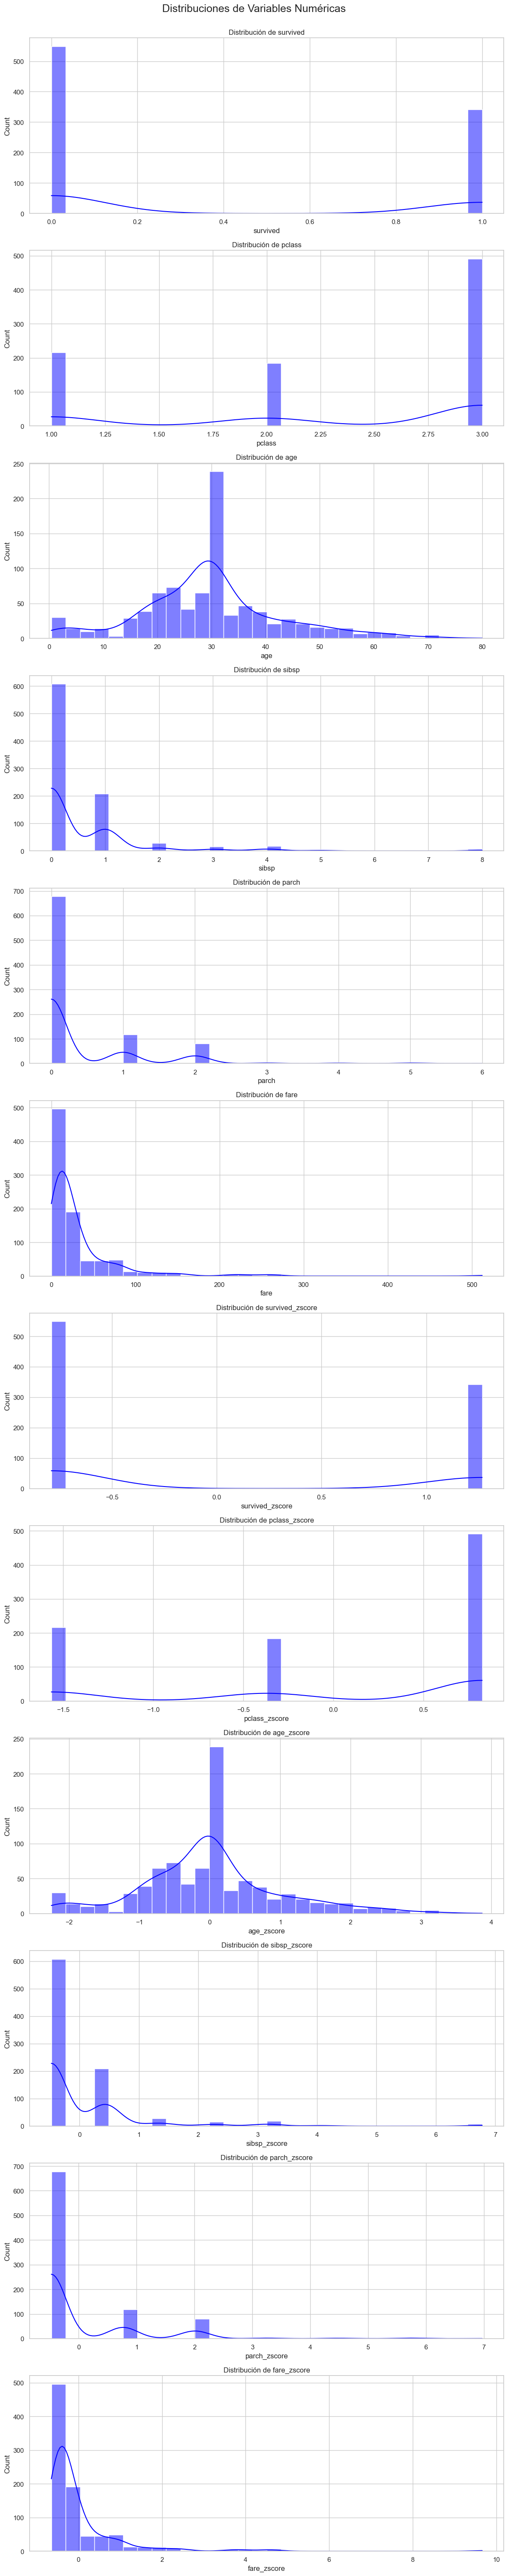

In [179]:
# Separar variables numéricas y categóricas
num_vars = df.select_dtypes(include=['float64', 'int64']).columns

fig_num, axes_num = plt.subplots(len(num_vars), 1, figsize=(12, 5 * len(num_vars)))
fig_num.suptitle('Distribuciones de Variables Numéricas', size=18, y=1)

if len(num_vars) == 1:
    axes_num = [axes_num]

for i, col in enumerate(num_vars):
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes_num[i], color='blue')
    axes_num[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

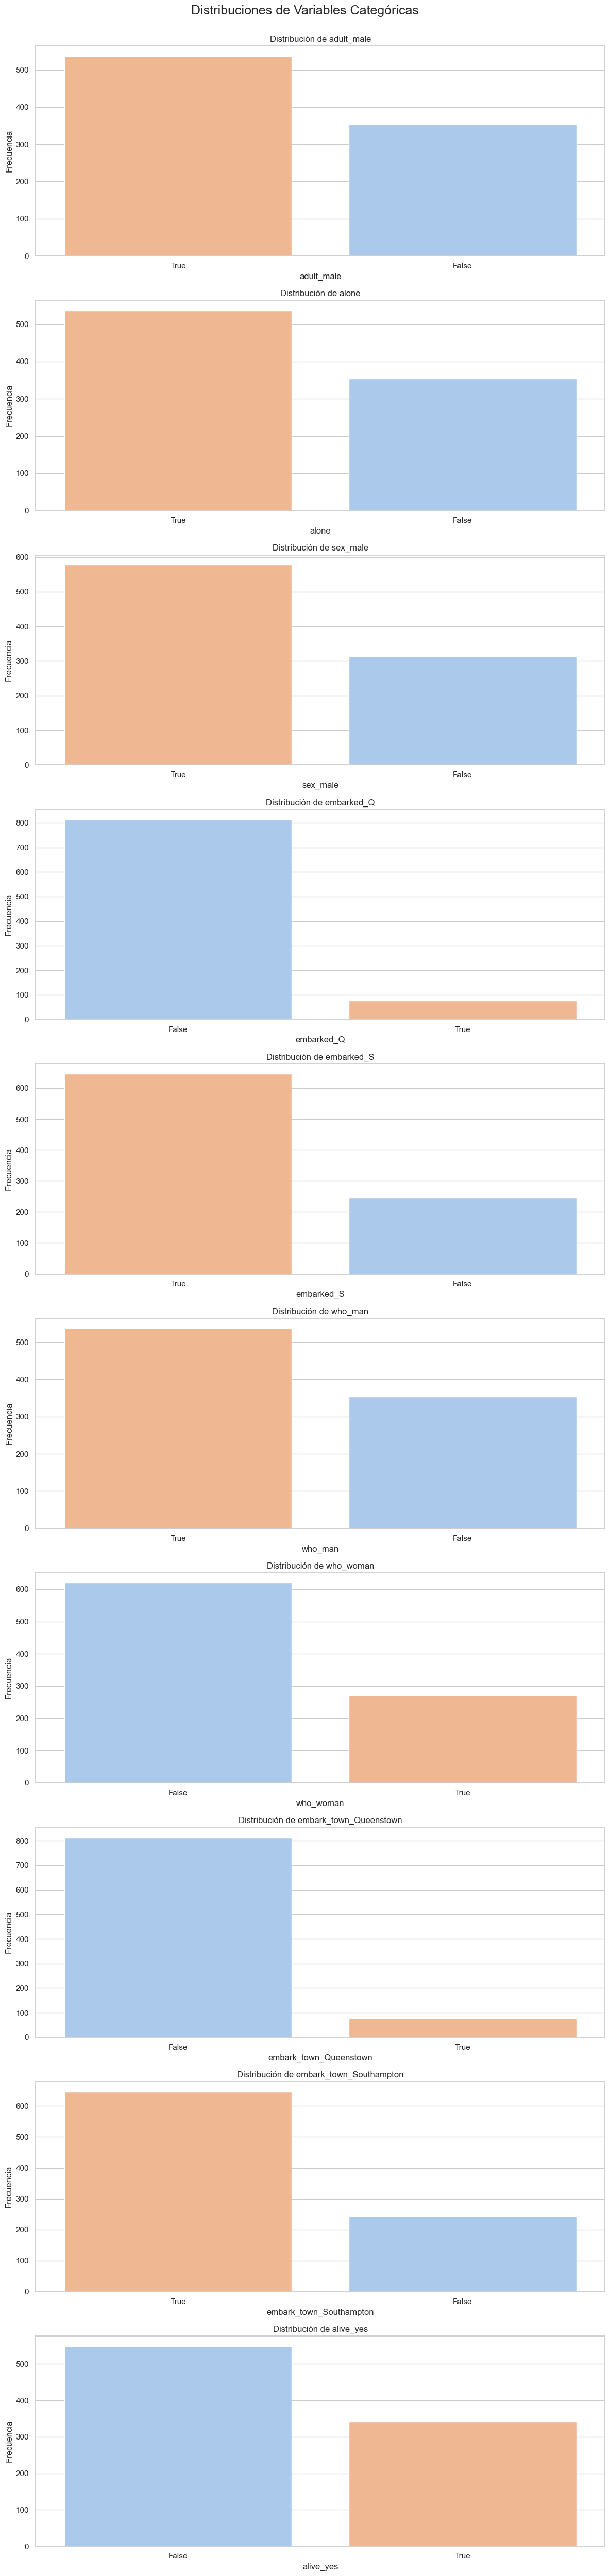

In [180]:
# Separar variables categóricas
cat_vars = df.select_dtypes(include=['boolean']).columns

fig_cat, axes_cat = plt.subplots(len(cat_vars), 1, figsize=(12, 5 * len(cat_vars)))
fig_cat.suptitle('Distribuciones de Variables Categóricas', size=18, y=1)

if len(cat_vars) == 1:
    axes_cat = [axes_cat]

for i, col in enumerate(cat_vars):
    sns.countplot(
        x=col,
        data=df,
        ax=axes_cat[i],
        hue=df[col],
        palette='pastel',
        order=df[col].value_counts().index,  
        legend=False 
    )
    axes_cat[i].set_title(f'Distribución de {col}')
    axes_cat[i].set_ylabel('Frecuencia')
    axes_cat[i].set_xlabel(col)

plt.tight_layout()
plt.show()


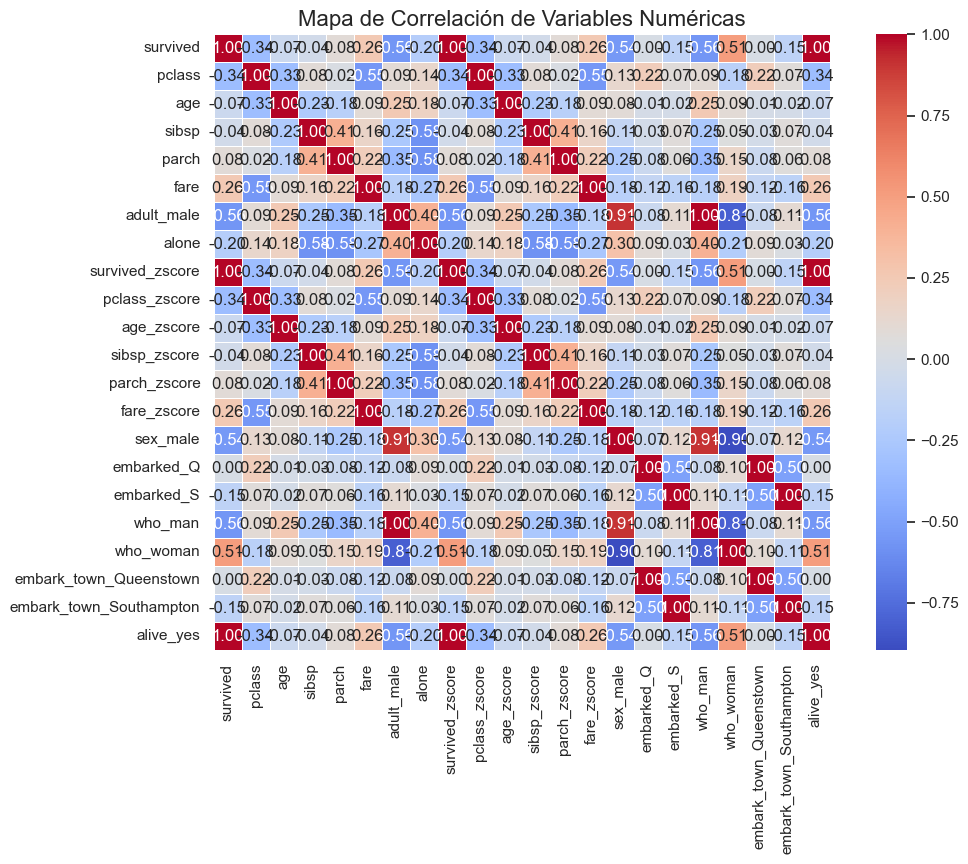

In [181]:
numeric_vars = df.select_dtypes(include=['number', 'boolean'])

# Calcular la matriz de correlación
correlation_matrix = numeric_vars.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title('Mapa de Correlación de Variables Numéricas', size=16)
plt.show()

**¿Qué patrones o insights iniciales notaron en los gráficos de distribución?**

Las variables numéricas pueden presentar distribuciones diferentes dependiendo de los datos, se pueden identificar sesgos en distintas variables como *fare* o *age*; en las variables categóricas se observa la frecuencia que tienen sus respectivos valores. 

Es posible la presencia de valores atípicos u outliers debido a la distribución que presentan algunas características. 

**¿Cómo interpretan las correlaciones encontradas?**

La matriz de correlación señala que ciertas características muestran una correlación alta (cercanas a 1 o -1) debido a la relación directa entre dichas características, como lo son *survived* con *alive_yes*, dicha relación no muestra alguna discordancia porque una depende de la otra. Dicho comportamiento se presenta en otras características que se relacionan de la misma manera. 

## 5. Estadística descriptiva

Calcular y analizar los momentos estadísticos de las variables relevantes (media, mediana, desviación estándar, curtosis, asimetría).
Identificar outliers y discutir cómo podrían influir en los resultados.

In [182]:
from scipy.stats import kurtosis, skew

relevant_vars = ['age', 'fare', 'survived', 'pclass', 'sex']

# Calcular momentos estadísticos
momentos = {}
for var in ['age', 'fare', 'survived', 'pclass']:
    momentos[var] = {
        'Media': df[var].mean(),
        'Mediana': df[var].median(),
        'Desviación Estándar': df[var].std(),
        'Curtosis': kurtosis(df[var]),
        'Asimetría': skew(df[var]),
        'Mínimo': df[var].min(),
        'Máximo': df[var].max()
    }

# Convertir resultados a DataFrame
momentos_df = pd.DataFrame(momentos)
print("Momentos estadísticos de las variables numéricas:")
print(momentos_df)

Momentos estadísticos de las variables numéricas:
                           age        fare  survived    pclass
Media                29.699118   32.204208  0.383838  2.308642
Mediana              29.699118   14.454200  0.000000  3.000000
Desviación Estándar  13.002015   49.693429  0.486592  0.836071
Curtosis              0.954139   33.204289 -1.771786 -1.279570
Asimetría             0.433756    4.779253  0.477717 -0.629486
Mínimo                0.420000    0.000000  0.000000  1.000000
Máximo               80.000000  512.329200  1.000000  3.000000


In [183]:
# Identificación de outliers usando el rango intercuartílico (IQR)
outliers = {}
for var in ['age', 'fare', 'survived', 'pclass']:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[var] = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]

    print(f"\nOutliers en la variable '{var}':")
    print(outliers[var])


Outliers en la variable 'age':
7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: age, Length: 66, dtype: float64

Outliers en la variable 'fare':
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: fare, Length: 116, dtype: float64

Outliers en la variable 'survived':
Series([], Name: survived, dtype: int64)

Outliers en la variable 'pclass':
Series([], Name: pclass, dtype: int64)


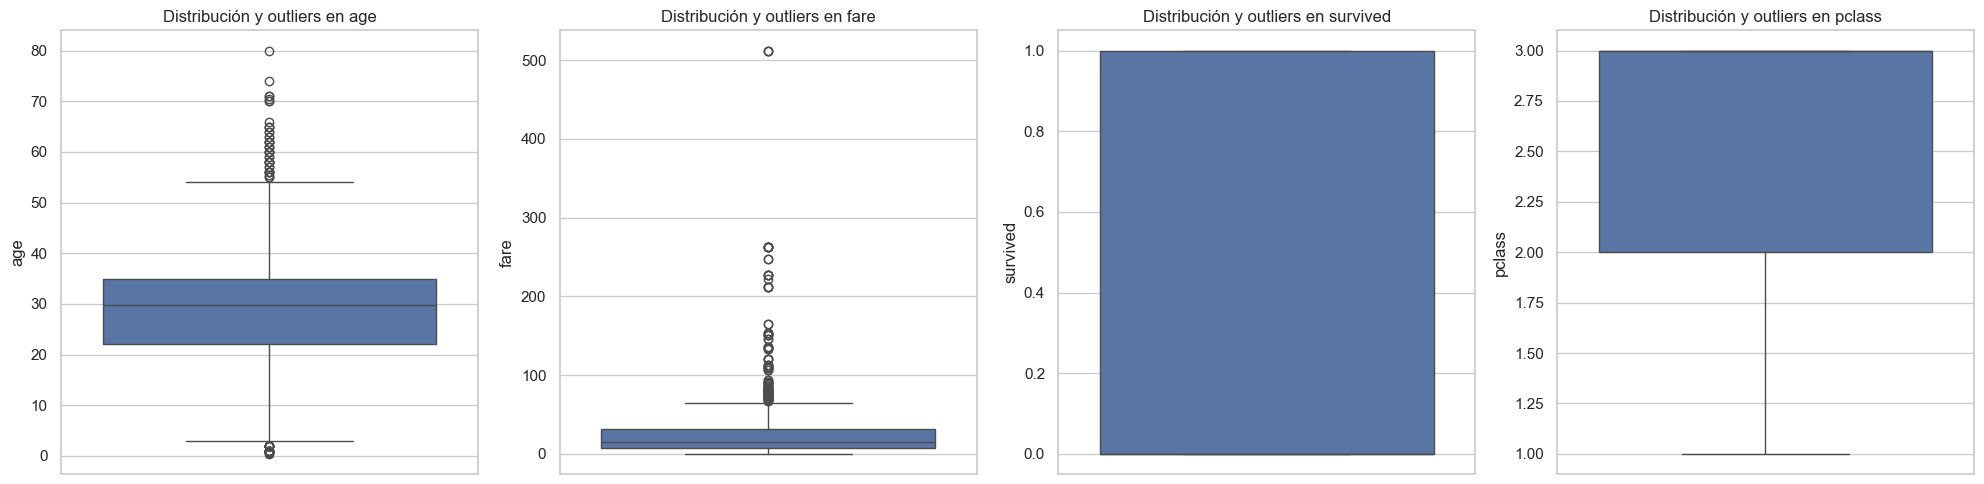

In [184]:
# Gráficos para visualizar la distribución y outliers
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, var in enumerate(['age', 'fare', 'survived', 'pclass']):
    sns.boxplot(data=df, y=var, ax=axes[i])
    axes[i].set_title(f"Distribución y outliers en {var}")
plt.tight_layout()
plt.show()

**¿Qué significan estos momentos estadísticos en el contexto del dataset Titanic?**

Los momentos estadísticos calculados nos permiten describir las distribuciones de las variables relevantes y detectar patrones como: las diferencias de edad entre los pasajeros, las brechas económicas presentes entre las clases sociales, etc. 


**¿Qué variables parecen tener valores extremos y cómo se podrían manejar?**

*Fare* es una variable que presenta valores extremos debido a los precios de los boletos dependiendo de la clase social del pasajero; eso se puede deducir también observando que la media es mucho mayor a la mediana, la asimetría es alta al igual que la curtosis. Dicho comportamiento también se hace presente en *age* y en *sibsp*. 

Para manejarlos se utilizan técnicas de métodos estadísticos como el Rango Intercuartílico, Z-score, etc. 

## Conclusión

Tras explorar y analizar el dataset del Titanic, se obtuvieron varios insights clave:

**Distribución de Variables:**

- Edad: La mayoría de los pasajeros eran adultos jóvenes, con una menor representación de personas mayores o niños.
- Tarifa: Existe una gran variabilidad en las tarifas, con algunos valores extremos asociados a boletos de clase alta.
- Supervivencia: Casi el 40% de los pasajeros sobrevivieron, con una relación notoria entre género y supervivencia.
- Clase de Pasajero: Una alta proporción de pasajeros viajaban en tercera clase, y su tasa de supervivencia era notablemente menor que la de primera clase.

**Correlaciones:**

La variable *class* mostró una correlación inversa con la supervivencia, lo que sugiere que los pasajeros en clases más altas tenían mayores probabilidades de sobrevivir.
Las variables *age* y *fare* no mostraron correlaciones significativas con la supervivencia, aunque *fare* se asoció indirectamente con la clase del pasajero.

**Momentos Estadísticos:**

- Media y mediana: Reflejaron la asimetría en variables como la tarifa, donde los valores altos influyen significativamente en la media.
- Curtosis y asimetría: Identificaron distribuciones altamente sesgadas, particularmente en las tarifas, lo que puede impactar análisis posteriores si no se manejan correctamente.

**Outliers:**

Se detectaron valores extremos en las tarifas y edades. Algunos pasajeros pagaron tarifas excepcionalmente altas que distorsionaron las estadísticas descriptivas.
Los outliers fueron tratados utilizando límites basados en el rango intercuartílico (IQR), lo que permitió reducir su influencia en el análisis.

**Manejo de Outliers:**

Eliminar o ajustar outliers permitió obtener representaciones más realistas de las distribuciones, particularmente en variables como tarifa y edad.
Relevancia del Análisis:
El análisis demuestra que la supervivencia en el Titanic no fue aleatoria, sino que estuvo influenciada por factores como género, clase y posiblemente la tarifa. La limpieza y transformación de los datos, junto con el manejo de outliers, aseguraron que los resultados fueran más fiables y representativos.